# Time-Constraint NFV Profiling (or Benchmarking)

This file builds a first playground to start with the TC profiling work.



In [1]:
# global plotting setup
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
import numpy as np
import seaborn

# Model

We want to model complex network service chain that consists of multiple VNFs.

## Service

* A service is a directed graph of functions
* We don't consider multiple forwarding graphs
* We don't care about the links
* A service can have multiple `metrics` aka. `ServiceMetrics` that specify how the computed performance values of the VNFs are combined to represent the service's total performance (f: service_graph -> performance value)

## VNF

* A VNF is a single network function
* A VNF is a single VDU
* A VNF has a resource configuration: `cpu`, `mem`, `blkio`
* A service can have multiple `metrics` aka. `VnfMetrics` that specify its performance for a given configuration (f: configuration -> performance value)


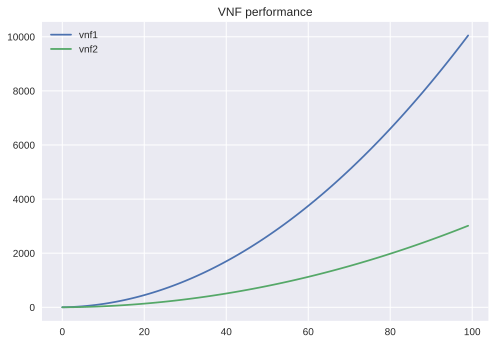

In [2]:


class Service(object):
    """
    Represents an abstract network service.
    Holds a DAG that represents the service chain
    and references the involved VNFs.
    """
    pass

class VNF(object):
    
    def __init__(self, name):
        self.name = name
        self._metrics = dict()
        
    def add_metric(self, m):
        self._metrics[m.name] = m
        
    def calc(self, m_name, cpu, mem, blkio):
        return self._metrics.get(m_name).calc(cpu, mem, blkio)
            

class ThroughputVnfMetric(object):
    
    def __init__(self, name, parameter):
        self.name = name
        self.parameter = parameter
                
    def calc(self, cpu, mem, blkio):
        return (cpu**2 + (mem * 2 + 0.5* blkio)) * self.parameter
         
m1 = ThroughputVnfMetric("t1", 1.0)
m2 = ThroughputVnfMetric("t1", 0.3)
v1 = VNF("vnf1")
v1. add_metric(m1)
v2 = VNF("vnf2")
v2. add_metric(m2)

# test
x1 = range(0, 100)
plt.plot(x1, [v1.calc("t1", i , i , i) for i in x1], label=v1.name)
plt.plot(x1, [v2.calc("t1", i , i , i) for i in x1], label=v2.name)
plt.title("VNF performance")
plt.legend()
plt.show()